# FloPy

### Quick demo on how to use FloPy to save array data as a binary file

In [1]:
%matplotlib inline
import os 
import sys
import shutil
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# run installed version of flopy or add local path
try:
    import flopy
except:
    fpth = os.path.abspath(os.path.join('..', '..'))
    sys.path.append(fpth)
    import flopy
    
print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

flopy is installed in /Users/jdhughes/Documents/Development/flopy_git/flopy_us/flopy
3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 02:16:08) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version: 1.14.5
matplotlib version: 2.2.2
flopy version: 3.2.11


In [2]:
nlay,nrow,ncol = 1,20,10
model_ws = os.path.join("data","binary_data")

if os.path.exists(model_ws):
    shutil.rmtree(model_ws)
    
precision = 'single' # or 'double'
dtype = np.float32 # or np.float64

mf = flopy.modflow.Modflow(model_ws=model_ws)
dis = flopy.modflow.ModflowDis(mf, nlay=nlay, nrow=nrow, ncol=ncol, delr=20, delc=10)

Create a linear data array

In [3]:
# create the first row of data
b = np.linspace(10, 1, num=ncol, dtype=dtype).reshape(1, ncol)

# extend data to every row
b = np.repeat(b, nrow, axis=0)

# print the shape and type of the data
print(b.shape)

(20, 10)


Plot the data array

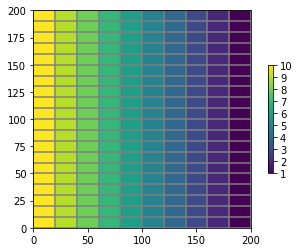

In [4]:
pmv = flopy.plot.PlotMapView(model=mf)
v = pmv.plot_array(b)
pmv.plot_grid()
plt.colorbar(v, shrink=0.5)

Write the linear data array to a binary file

In [5]:
text = 'head'

# write a binary data file
pertim = dtype(1.0)
header = flopy.utils.BinaryHeader.create(bintype=text, precision=precision,
                                         text=text, nrow=nrow, ncol=ncol,
                                         ilay=1, pertim=pertim,
                                         totim=pertim, kstp=1, kper=1)
pth = os.path.join(model_ws, 'bottom.bin')
flopy.utils.Util2d.write_bin(b.shape, pth, b, header_data=header)

Read the binary data file

In [6]:
bo = flopy.utils.HeadFile(pth, precision=precision)
br = bo.get_data(idx=0)

Plot the data that was read from the binary file

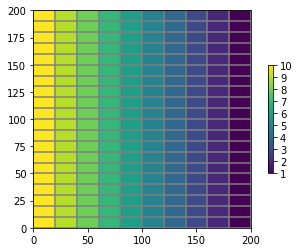

In [7]:
pmv= flopy.plot.PlotMapView(model=mf)
v = pmv.plot_array(br)
pmv.plot_grid()
plt.colorbar(v, shrink=0.5)

Plot the difference in the two values

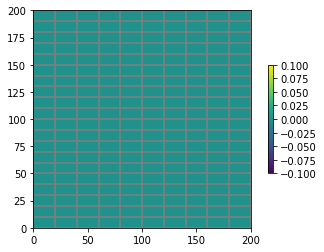

In [8]:
pmv = flopy.plot.PlotMapView(model=mf)
v = pmv.plot_array(b-br)
pmv.plot_grid()
plt.colorbar(v, shrink=0.5)